In [1]:
# 1. Data Exploration:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train_df = pd.read_csv("D:\\Data Science\\assignments\\Titanic_train.csv")
test_df = pd.read_csv("D:\\Data Science\\assignments\\Titanic_test.csv")

# Display first few rows
print(train_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [2]:
print(test_df.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [3]:
# Check column types and summary
print(train_df.info())
print(train_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top  

In [4]:
# Check for missing values
print("\nMissing Values of train dataset:\n", train_df.isnull().sum())


Missing Values of train dataset:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


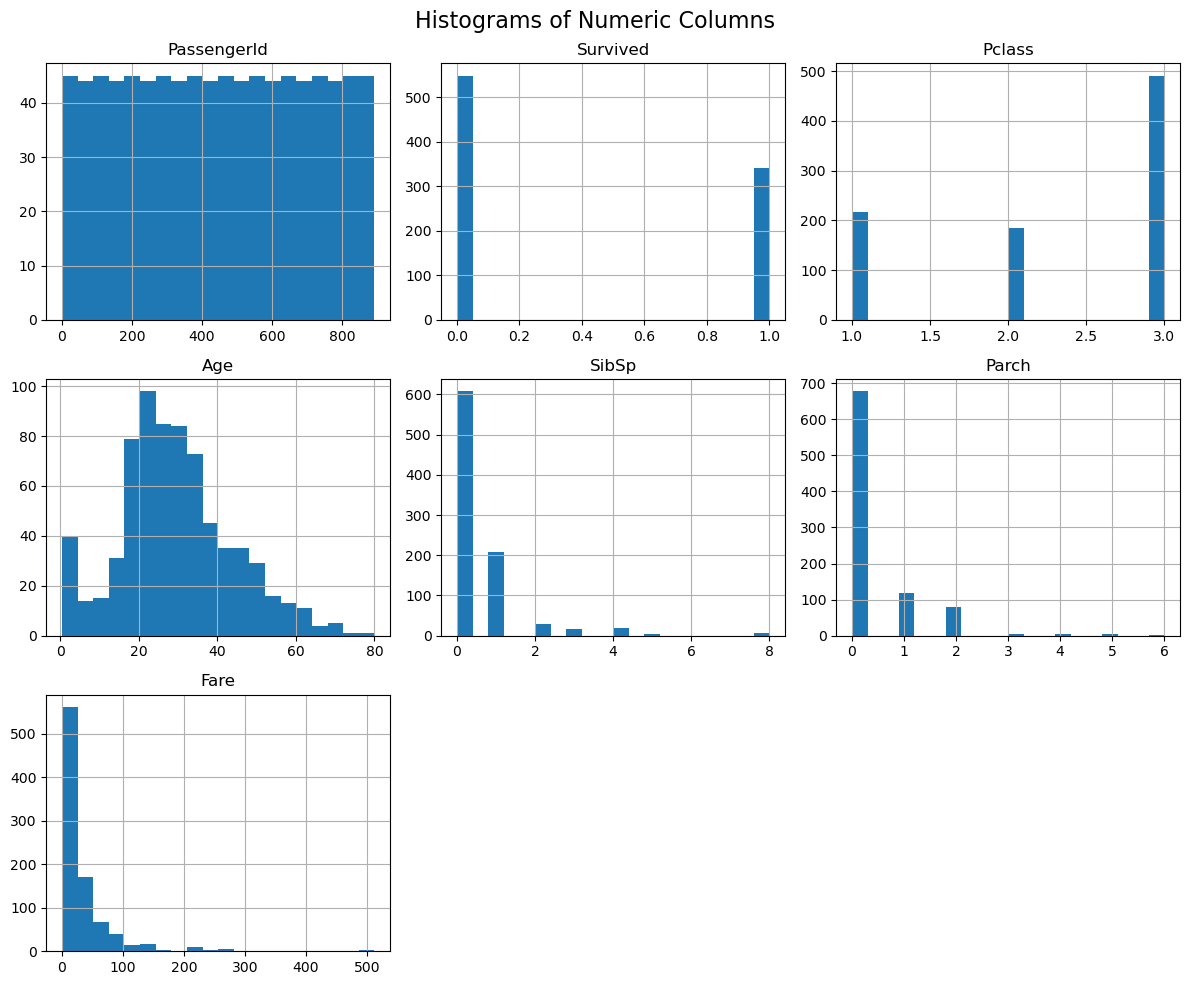

In [5]:
# Visualizations
# Histogram
train_df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms of Numeric Columns", fontsize=16)
plt.tight_layout()
plt.show()

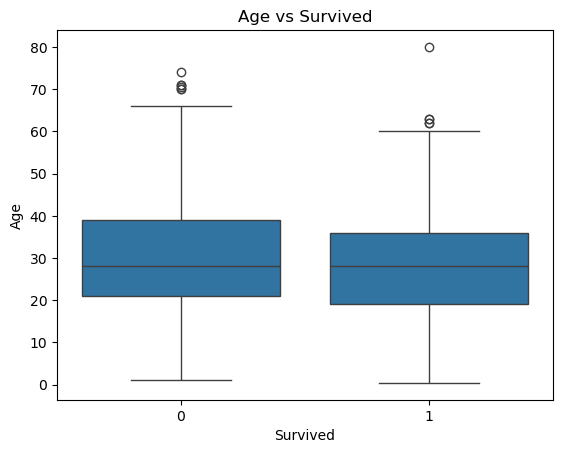

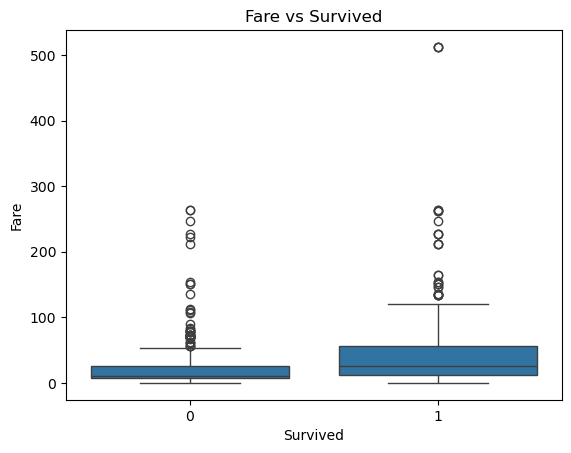

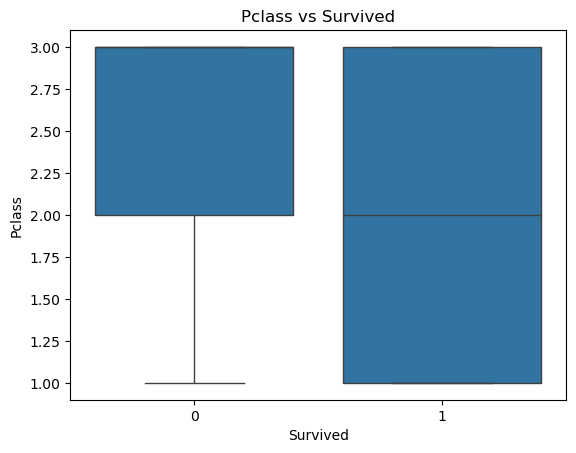

In [6]:
# Boxplots for numeric features by survival
numeric_cols = ['Age', 'Fare', 'Pclass']
for col in numeric_cols:
    sns.boxplot(x='Survived', y=col, data=train_df)
    plt.title(f"{col} vs Survived")
    plt.show()

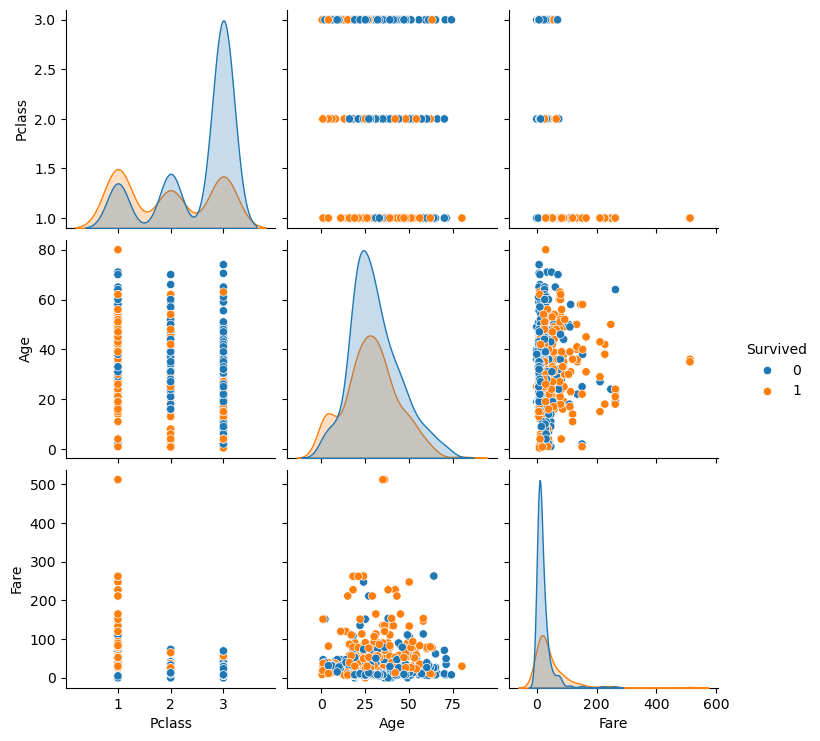

In [7]:
# Pairplot
sns.pairplot(train_df[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived')
plt.show()

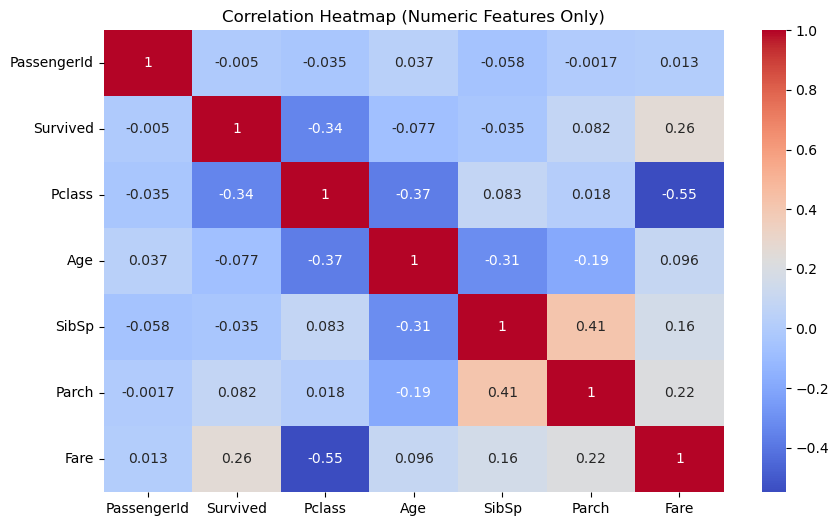

In [8]:
# Correlation Heatmap
# Select only numeric columns
numeric_df = train_df.select_dtypes(include=['number'])

# Compute and plot correlation
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()


In [9]:
# 2. Data Preprocessing:

# Impute missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Drop columns with too many missing or irrelevant info
train_df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)


C:\Users\admin\AppData\Local\Temp\ipykernel_7708\2436979218.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_7708\2436979218.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [10]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [11]:
# Encode categorical variables
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)

In [12]:
train_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True,False,True
887,1,1,19.0,0,0,30.0000,False,False,True
888,0,3,28.0,1,2,23.4500,False,False,True
889,1,1,26.0,0,0,30.0000,True,False,False


In [13]:
# Check for missing values
print("\nMissing Values of test dataset:\n", test_df.isnull().sum())


Missing Values of test dataset:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [14]:
# Apply the same steps to test_df
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
test_df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], drop_first=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_7708\1452743260.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_7708\1452743260.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [15]:
test_df

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,True,True,False
1,3,47.0,1,0,7.0000,False,False,True
2,2,62.0,0,0,9.6875,True,True,False
3,3,27.0,0,0,8.6625,True,False,True
4,3,22.0,1,1,12.2875,False,False,True
...,...,...,...,...,...,...,...,...
413,3,27.0,0,0,8.0500,True,False,True
414,1,39.0,0,0,108.9000,False,False,False
415,3,38.5,0,0,7.2500,True,False,True
416,3,27.0,0,0,8.0500,True,False,True


In [16]:
# Outlier Removal on Both Train & Test Datasets

# Calculate IQR thresholds from the training data
def get_iqr_bounds(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Get IQR bounds from training data
age_lower, age_upper = get_iqr_bounds(train_df, 'Age')
fare_lower, fare_upper = get_iqr_bounds(train_df, 'Fare')

# Apply these bounds to filter out outliers in train and test data
train_df = train_df[(train_df['Age'] >= age_lower) & (train_df['Age'] <= age_upper)]
train_df = train_df[(train_df['Fare'] >= fare_lower) & (train_df['Fare'] <= fare_upper)]

test_df = test_df[(test_df['Age'] >= age_lower) & (test_df['Age'] <= age_upper)]
test_df = test_df[(test_df['Fare'] >= fare_lower) & (test_df['Fare'] <= fare_upper)]


In [17]:
train_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True
5,0,3,28.0,0,0,8.4583,True,True,False
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True,False,True
887,1,1,19.0,0,0,30.0000,False,False,True
888,0,3,28.0,1,2,23.4500,False,False,True
889,1,1,26.0,0,0,30.0000,True,False,False


In [18]:
test_df

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,True,True,False
1,3,47.0,1,0,7.0000,False,False,True
3,3,27.0,0,0,8.6625,True,False,True
4,3,22.0,1,1,12.2875,False,False,True
5,3,14.0,0,0,9.2250,True,False,True
...,...,...,...,...,...,...,...,...
412,3,28.0,0,0,7.7750,False,False,True
413,3,27.0,0,0,8.0500,True,False,True
415,3,38.5,0,0,7.2500,True,False,True
416,3,27.0,0,0,8.0500,True,False,True


In [19]:
# 3. Model Building:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Features and target
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model using training data
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predictions using validation set
y_pred = logreg.predict(X_val)
y_proba = logreg.predict_proba(X_val)[:, 1]


In [20]:
# 4. Model Evaluation:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("ROC AUC Score:", roc_auc_score(y_val, y_proba))

Accuracy: 0.7862068965517242
Precision: 0.6938775510204082
Recall: 0.68
F1 Score: 0.6868686868686869
ROC AUC Score: 0.8333684210526316


In [ ]:
""" 
Since the provided test dataset does not contain the target variable (Survived), we cannot directly evaluate performance 
on it.
Therefore, we split the training data into training and validation sets.
The validation set, which was not seen during training, serves as a proxy for the test set and is used for model 
evaluation.
We computed accuracy, precision, recall, F1 score, and ROC AUC on the validation data.

"""

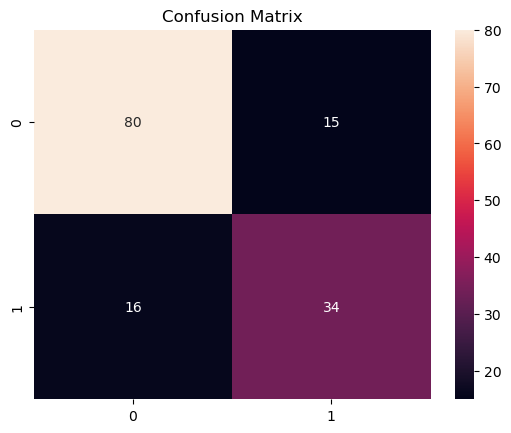

In [21]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()

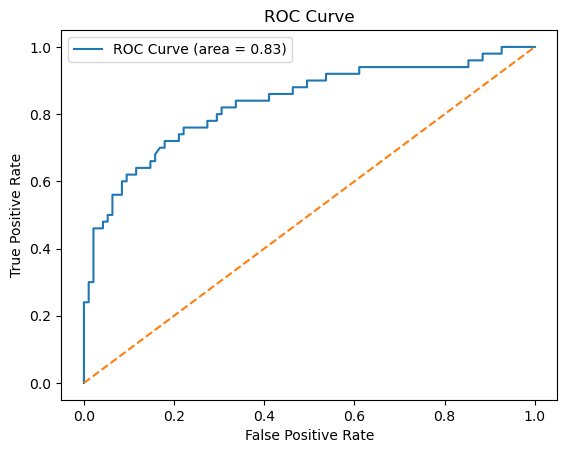

In [22]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_proba)
plt.plot(fpr, tpr, label="ROC Curve (area = %0.2f)" % roc_auc_score(y_val, y_proba))
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [23]:
# By using Cross-Validation

from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Pipeline with scaling and logistic regression
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))
])

# Get predicted class labels using 5-fold CV
y_pred_cv = cross_val_predict(pipe, X, y, cv=5, method='predict')

# Get predicted probabilities (for ROC curve)
y_proba_cv = cross_val_predict(pipe, X, y, cv=5, method='predict_proba')[:, 1]

# Evaluate metrics
print("Accuracy:", accuracy_score(y, y_pred_cv))
print("Precision:", precision_score(y, y_pred_cv))
print("Recall:", recall_score(y, y_pred_cv))
print("F1 Score:", f1_score(y, y_pred_cv))
print("ROC AUC Score:", roc_auc_score(y, y_proba_cv))


Accuracy: 0.782246879334258
Precision: 0.6853448275862069
Recall: 0.654320987654321
F1 Score: 0.6694736842105263
ROC AUC Score: 0.8244787092997228


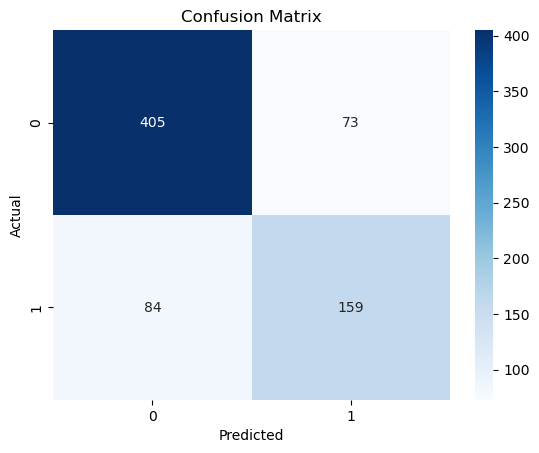

In [24]:
# Confusion matrix
cm = confusion_matrix(y, y_pred_cv)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


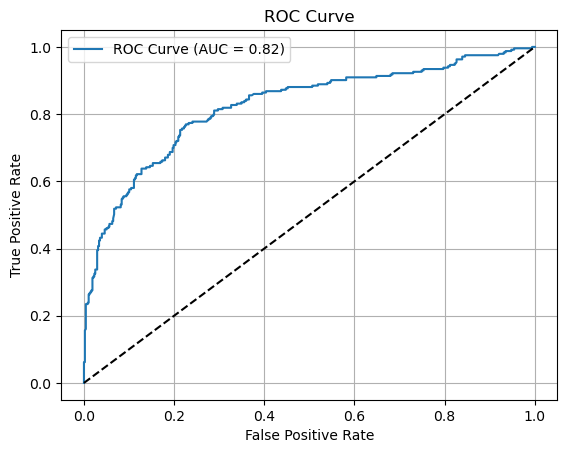

In [25]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y, y_proba_cv)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y, y_proba_cv):.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

In [26]:
# 5. Interpretation:

# a. Interpreting the coefficients 
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": logreg.coef_[0]
})
print(coefficients.sort_values(by="Coefficient", ascending=False))


      Feature  Coefficient
6  Embarked_Q     0.178308
4        Fare     0.039242
1         Age    -0.035040
3       Parch    -0.204837
7  Embarked_S    -0.286937
2       SibSp    -0.515693
0      Pclass    -0.687940
5    Sex_male    -2.473074


In [ ]:
"""
b. Significance of Features in Predicting Survival Probability

-> To understand which features are most influential in predicting survival (i.e., the Survived variable), we can analyze
   the coefficients of the logistic regression model.

-> Each feature has an associated coefficient (positive or negative).

    Positive coefficient = increases the log-odds of survival (more likely to survive).
    Negative coefficient = decreases the log-odds of survival (less likely to survive).
    Larger absolute value = more influence.
    
-> Based on the coefficients we got,
    1. The most impactful factor is Sex_male — being male significantly decreased survival odds.
    2. Pclass, SibSp, and Embarked_S also had notable negative effects.
    3. Positive influence: Fare and Embarked_Q — but their effect is relatively small.
    4. Age and Parch have weak negative effects.

"""

In [28]:
# 6. Deployment with Streamlit:

# Saving the Trained Model

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import joblib

# Create the pipeline with scaler and model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))
])

# Fit the pipeline on full training data (not split)
pipeline.fit(X, y)

# Save the fitted pipeline (not just the model)
joblib.dump(pipeline, 'logistic_model.pkl')


['logistic_model.pkl']

In [ ]:
"""
app.py

import streamlit as st
import joblib
import numpy as np

# Load the saved model
model = joblib.load('logistic_model.pkl')

# Title
st.title("Titanic Survival Prediction App")

# Sidebar input fields
st.sidebar.header("Passenger Input Features")

# Collect user input
Pclass = st.sidebar.selectbox("Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)", [1, 2, 3])
Sex = st.sidebar.selectbox("Sex", ["male", "female"])
Age = st.sidebar.slider("Age", 0, 100, 30)
SibSp = st.sidebar.slider("Siblings/Spouses Aboard", 0, 10, 0)
Parch = st.sidebar.slider("Parents/Children Aboard", 0, 10, 0)
Fare = st.sidebar.slider("Fare Paid", 0.0, 500.0, 50.0)
Embarked = st.sidebar.selectbox("Port of Embarkation", ['C', 'Q', 'S'])

# Convert categorical to numerical (match training encoding)
Sex_male = 1 if Sex == "male" else 0
Embarked_Q = 1 if Embarked == "Q" else 0
Embarked_S = 1 if Embarked == "S" else 0

# Create feature array (match model input order!)
features = np.array([[Pclass, Age, SibSp, Parch, Fare, Sex_male, Embarked_Q, Embarked_S]])

# Predict
if st.button("Predict Survival"):
    prediction = model.predict(features)[0]
    probability = model.predict_proba(features)[0][1]

    if prediction == 1:
        st.success(f"Passenger is likely to SURVIVE with probability {probability:.2f}")
    else:
        st.error(f"Passenger is likely to NOT survive with probability {1 - probability:.2f}")

"""

In [ ]:
"""
-> The trained model was deployed online using Streamlit Community Cloud.
-> The app files (app.py, logistic_model.pkl, and requirements.txt) were uploaded to a GitHub repository.
-> Streamlit Cloud was connected to the repository, which automatically installed dependencies and hosted the app.
-> Here is the link to view the app: 
   
   LINK : https://logistic-regression-app-htkvpdejxuexbldowavjy2.streamlit.app/

"""

In [ ]:
"""
Interview Questions:

1. What is the difference between precision and recall?

Precision - The ratio of correctly predicted positive observations to the total predicted positives. It focuses on how 
            many of the predicted positives are actually correct.
            
Recall - The ratio of correctly predicted positive observations to all actual positives. It focuses on how many of the 
         actual positives were correctly identified.

Formulae:

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

When to prioritize:

High Precision: When false positives are more costly.

High Recall: When false negatives are more critical.


2. What is cross-validation, and why is it important in binary classification?

-> Cross-validation is a model validation technique used to assess how well a model generalizes to an unseen dataset.
-> Instead of training and testing on one fixed split, the data is split into multiple folds and the model is trained and 
   evaluated multiple times with different splits.

Types:
a. Shuffle Split cross-validation: This method randomly shuffles and split the dataset multiple times into train and 
   test sets
b. K-fold cross-validation: Here, the dataset is divided into k equal parts. The model is trained on k-1 folds and tested
   on the remaining folds.


How it works (e.g., 5-Fold CV):

1. Split the dataset into 5 parts (folds)
2. Use 4 folds to train the model, 1 fold to test
3. Repeat 5 times (each fold is used as test set once)
4. Average the results to get a more reliable performance estimate.

Why it is important in binary classification:

1. Reduces overfitting risk by testing the model on different subsets.
2. Provides a more accurate measure of model performance (especially on imbalanced data).
3. Helps select the best model or hyperparameters by comparing average scores like accuracy, precision, recall, F1, etc.
4. Ensures that the model performs well not just on one specific train-test split, but in general.

"""